## Task 2:Exploratory Data Analysis

In [4]:
# Pandas is used for data manipulation and analysis
import pandas as pd

In [5]:
# Matplotlib and seaborn is used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load cleaned dataset created in Task 1
df=pd.read_csv('cleaned_customer_churn.csv')

#### We use cleaned dataset to ensure there are no null or incorrect datatypes during analysis and prediction

In [7]:
# Display first 5 rows
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [8]:
# Check datatypes and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [9]:
# Calculate overall churn rate
churn_rate=df['Churn_Yes'].mean()
churn_rate

0.2653698707936959

In [10]:
churn_rate*100

26.536987079369588

#### About 26.5% of customer churned/left
#### About 73.5% of customer are retained/stayed

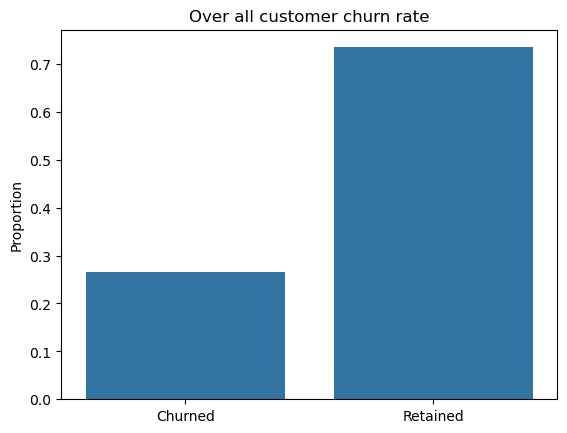

In [12]:
# Visualizing churn rate 
plt.figure()
sns.barplot(x=['Churned','Retained'],y=[df['Churn_Yes'].mean(),1-df['Churn_Yes'].mean()])
plt.title("Over all customer churn rate")
plt.ylabel('Proportion')
plt.show()

#### This chart show the percentage of customer left vs stayed

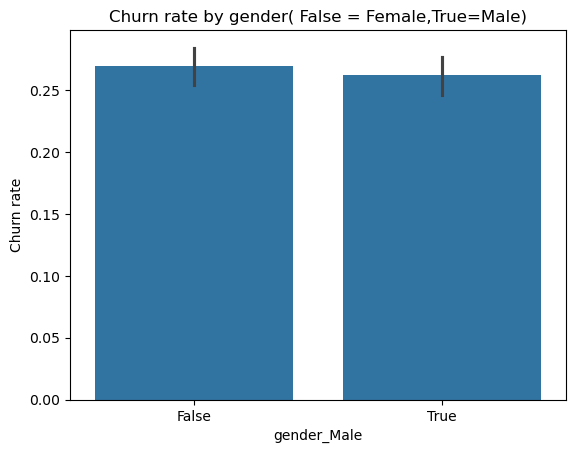

In [15]:
# Analysis churn by gender
plt.figure()
sns.barplot(x='gender_Male',y='Churn_Yes',data=df)
plt.title("Churn rate by gender( False = Female,True=Male)")
plt.ylabel('Churn rate')
plt.show()

#### The churn rate of male and female is very similar,indicate gender is not major factor

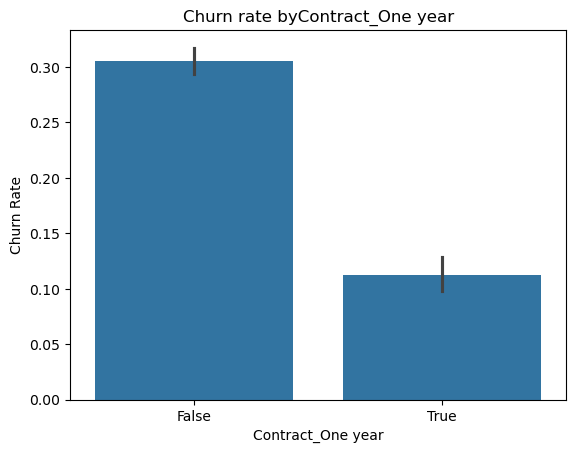

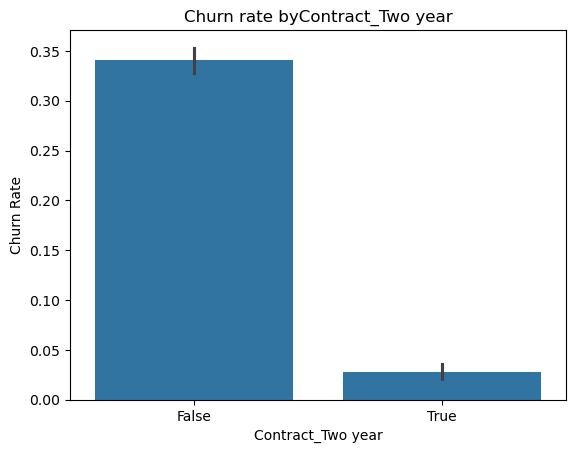

In [17]:
# Analyzing churn rate by contract type
contract_columns=['Contract_One year','Contract_Two year']
for col in contract_columns:
    plt.figure()
    sns.barplot(x=df[col],y=df['Churn_Yes'])
    plt.title(f'Churn rate by{col}')
    plt.ylabel("Churn Rate")
    plt.show()

#### Customer with month-to-month contracts have a significantly higher churn rate compared to long-term contract customer

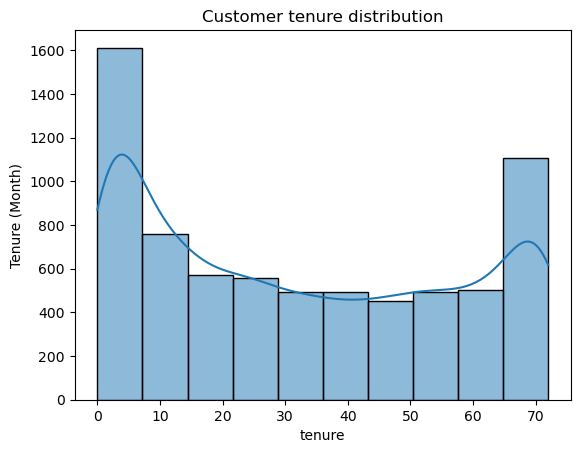

In [18]:
# Distribution of costumer tenure
plt.figure()
sns.histplot(df['tenure'],bins=10,kde=True)
plt.title("Customer tenure distribution")
plt.ylabel('Tenure (Month)')
plt.show()

#### Tenure indicate how long a customer has been with the company
#### A large number of customer have low tenure 

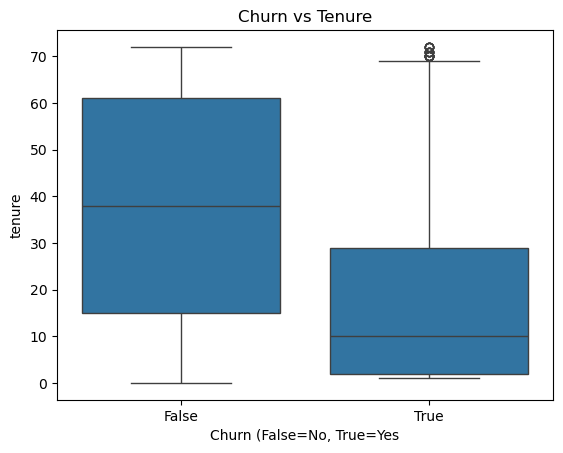

In [20]:
# Comparing tenure for churned and non-churned customers
plt.figure()
sns.boxplot(x='Churn_Yes',y='tenure',data=df)
plt.title('Churn vs Tenure')
plt.xlabel('Churn (False=No, True=Yes')
plt.show()

#### Customer with shorter tenure are more likely to churn, while long term customer tend to stay

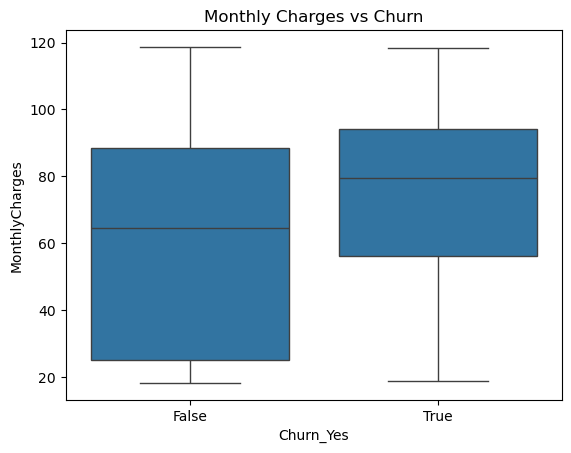

In [24]:
# Comparing monthly charges for churned and non churned customers
plt.figure()
sns.boxplot(x='Churn_Yes',y='MonthlyCharges',data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

#### This helps understand whether higher service costs influence churn
#### Customer with higher monthly charges are more likely to churn

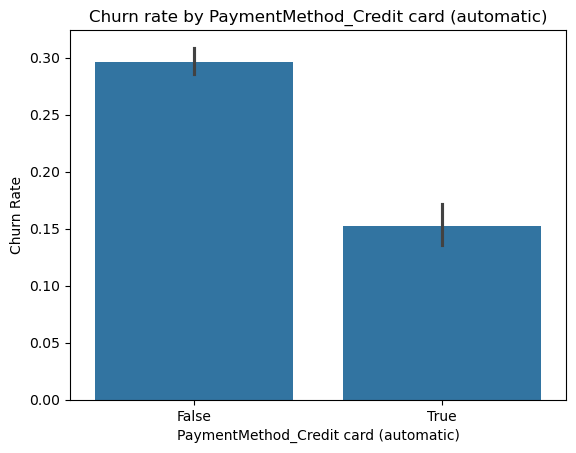

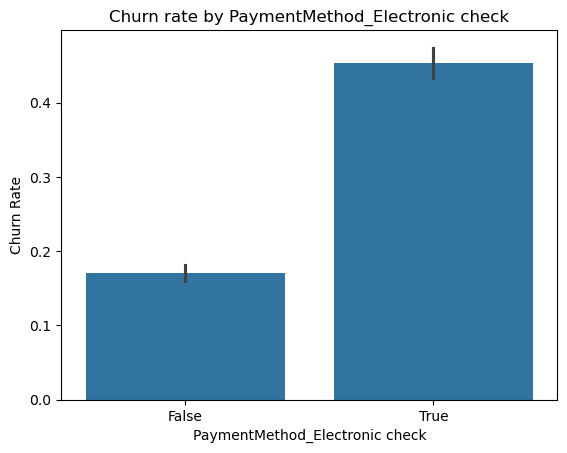

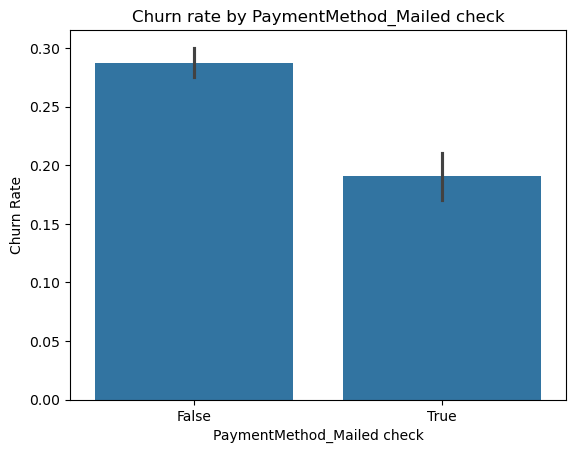

In [25]:
# Identifying payment method columns
payment_columns=[col for col in df.columns if 'PaymentMethod' in col]
#Analyzing churn rate by payment method
for col in payment_columns:
    plt.figure()
    sns.barplot(x=df[col],y=df['Churn_Yes'])
    plt.title(f'Churn rate by {col}')
    plt.ylabel('Churn Rate')
    plt.show()

#### Customer using electonic check payment methods show higher churn rate compared to other compared to other payment methods